In [1]:
from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
import basedosdados as bd
import seaborn as sns
import matplotlib.pyplot as plt

# Carrega as variáveis de ambiente do arquivo .env
load_dotenv()

# Obtém o ID do projeto do Google Cloud a partir das variáveis de ambiente
project_id = os.getenv('GOOGLE_CLOUD_PROJECT')

In [2]:
# Definindo a consulta SQL para selecionar dados do Campeonato Brasileiro Série A entre 2015 e 2024
query_br = '''
SELECT
    ano_campeonato, rodada, estadio, publico, publico_max, time_mandante, gols_mandante, time_visitante, gols_visitante,
    arbitro, escanteios_mandante, escanteios_visitante, faltas_mandante, faltas_visitante, impedimentos_mandante, impedimentos_visitante
FROM `basedosdados.mundo_transfermarkt_competicoes.brasileirao_serie_a`
WHERE ano_campeonato >= 2015 AND ano_campeonato <= 2024
'''

# Executar a consulta SQL e carregar os dados em um DataFrame
df_br = bd.read_sql(query_br, billing_project_id=project_id)

# Salvar o DataFrame em um arquivo CSV
df_br.to_csv('../data/brasileirao_2015_2024.csv')

# Exibir as primeiras linhas do DataFrame
df_br.head()

Downloading: 100%|██████████|


,ano_campeonato,rodada,estadio,publico,publico_max,time_mandante,gols_mandante,time_visitante,gols_visitante,arbitro,escanteios_mandante,escanteios_visitante,faltas_mandante,faltas_visitante,impedimentos_mandante,impedimentos_visitante
0,2019,2,Estádio Rei Pelé,15735,20000,CSA,1,Palmeiras,1,Caio Max Augusto Vieira,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,2019,12,Estádio Rei Pelé,11918,20000,CSA,0,Grêmio,0,Caio Max Augusto Vieira,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,2019,14,Estádio Rei Pelé,9924,20000,CSA,0,Fortaleza,2,Gilberto Rodrigues Castro Junior,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,2019,16,Estádio Rei Pelé,8715,20000,CSA,1,Cruzeiro,1,Marcelo de Lima Henrique,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,2019,18,Estádio Rei Pelé,9311,20000,CSA,2,Chapecoense,0,Vinicius Gonçalves Dias Araujo,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [3]:
# Carrega o dataset 'brasileirao_2015_2024.csv' localizado na pasta '../data'
# As configurações do GCP não são necessárias, pois os dados já estão disponíveis localmente
df_br = pd.read_csv('../data/brasileirao_2015_2024.csv', index_col=0)

# Exibe informações sobre o DataFrame, como tipo de dados e contagem de entradas
df_br.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3706 entries, 0 to 3705
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ano_campeonato          3706 non-null   int64  
 1   rodada                  3706 non-null   int64  
 2   estadio                 3706 non-null   object 
 3   publico                 3705 non-null   float64
 4   publico_max             3673 non-null   float64
 5   time_mandante           3706 non-null   object 
 6   gols_mandante           3705 non-null   float64
 7   time_visitante          3706 non-null   object 
 8   gols_visitante          3705 non-null   float64
 9   arbitro                 3706 non-null   object 
 10  escanteios_mandante     2090 non-null   float64
 11  escanteios_visitante    2090 non-null   float64
 12  faltas_mandante         2090 non-null   float64
 13  faltas_visitante        2090 non-null   float64
 14  impedimentos_mandante   2090 non-null   float

In [4]:
# Exibe a contagem de partidas por ano de campeonato em ordem
print(df_br['ano_campeonato'].value_counts().sort_index())

# Verifica se todos os anos possuem exatamente 10 rodadas completas
for ano in range(2014, 2025):
    rodadas = df_br.query(f'ano_campeonato == {ano}')['rodada'].value_counts().sort_index()
    test = (rodadas == 10).all() # Verificação se todas as rodadas do ano são iguais a 10
    print(ano, test)

# Filtra os dados para incluir apenas campeonatos até 2023
df_br = df_br.query('ano_campeonato < 2024') # Ainda existem rodadas incompletas na tabela de 2024

ano_campeonato
2015    380
2016    380
2017    380
2018    380
2019    380
2020    380
2021    380
2022    380
2023    380
2024    286
Name: count, dtype: int64
2014 True
2015 True
2016 True
2017 True
2018 True
2019 True
2020 True
2021 True
2022 True
2023 True
2024 False


In [5]:
# Checando único valor ausente nas colunas 'publico', 'gols_mandante' e 'gols_visitante'
df_br.query('publico.isna()')

,ano_campeonato,rodada,estadio,publico,publico_max,time_mandante,gols_mandante,time_visitante,gols_visitante,arbitro,escanteios_mandante,escanteios_visitante,faltas_mandante,faltas_visitante,impedimentos_mandante,impedimentos_visitante
2191,2016,38,Arena Condá,NaN,22600.0,Chapecoense,NaN,Atlético-MG,NaN,Rodrigo D'Alonso Ferreira,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Seleciona o índice do jogo da Chapecoense na 38ª rodada de 2016
# WO definido por conta do acidente áereo sofrido pelo time da Chape
idx = df_br.query('ano_campeonato == 2016 & rodada == 38 & time_mandante == "Chapecoense"').index

# Seleciona as colunas numéricas, exceto 'ano_campeonato', 'rodada' e 'publico_max'
cols = df_br.select_dtypes(include='number').columns.difference(['ano_campeonato', 'rodada', 'publico_max'])

# Atribui zero às variáveis numéricas selecionadas para o jogo afetado pelo WO
df_br.loc[idx, cols] = 0

# Confirma que as alterações foram feitas para o jogo específico
df_br.query('ano_campeonato == 2016 & rodada == 38 & time_mandante == "Chapecoense"')

,ano_campeonato,rodada,estadio,publico,publico_max,time_mandante,gols_mandante,time_visitante,gols_visitante,arbitro,escanteios_mandante,escanteios_visitante,faltas_mandante,faltas_visitante,impedimentos_mandante,impedimentos_visitante
2191,2016,38,Arena Condá,0.0,22600.0,Chapecoense,0.0,Atlético-MG,0.0,Rodrigo D'Alonso Ferreira,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Calcula a moda para 'publico_max' agrupado por 'estadio'
estadio_mode = (
    df_br
    .groupby('estadio')['publico_max']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
)

# Preenche valores nulos em 'publico_max' usando a moda calculada por 'estadio'
df_br['publico_max'] = df_br['publico_max'].fillna(df_br['estadio'].map(estadio_mode))

# Exibe informações sobre o DataFrame
df_br.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3420 entries, 0 to 3705
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ano_campeonato          3420 non-null   int64  
 1   rodada                  3420 non-null   int64  
 2   estadio                 3420 non-null   object 
 3   publico                 3420 non-null   float64
 4   publico_max             3419 non-null   float64
 5   time_mandante           3420 non-null   object 
 6   gols_mandante           3420 non-null   float64
 7   time_visitante          3420 non-null   object 
 8   gols_visitante          3420 non-null   float64
 9   arbitro                 3420 non-null   object 
 10  escanteios_mandante     1880 non-null   float64
 11  escanteios_visitante    1880 non-null   float64
 12  faltas_mandante         1880 non-null   float64
 13  faltas_visitante        1880 non-null   float64
 14  impedimentos_mandante   1880 non-null   float

In [8]:
# Checa valor ausente restante na 'publico_max': jogo do Goiás na rodada 27 do ano de 2023
df_br.query('publico_max.isna()')

,ano_campeonato,rodada,estadio,publico,publico_max,time_mandante,gols_mandante,time_visitante,gols_visitante,arbitro,escanteios_mandante,escanteios_visitante,faltas_mandante,faltas_visitante,impedimentos_mandante,impedimentos_visitante
1050,2023,27,Estádio de Hailé Pinheiro,12685.0,NaN,Goiás,2.0,São Paulo,0.0,Rodrigo Jose Pereira de Lima,6.0,3.0,18.0,15.0,0.0,0.0


In [9]:
# Calcula a moda de 'publico_max' para jogos em que o Goiás foi o mandante
goias_mode = (
    df_br
    .loc[df_br['time_mandante'] == 'Goiás', 'publico_max']
    .mode()
    .iloc[0]
)

# Obtém o índice do jogo específico do Goiás
idx = df_br.query('ano_campeonato == 2023 & rodada == 27 & time_mandante == "Goiás"').index

# Atualiza o valor de 'publico_max' com a moda calculada
df_br.loc[idx, 'publico_max'] = goias_mode

# Exibe os detalhes do jogo atualizado
df_br.query('ano_campeonato == 2023 & rodada == 27 & time_mandante == "Goiás"')

,ano_campeonato,rodada,estadio,publico,publico_max,time_mandante,gols_mandante,time_visitante,gols_visitante,arbitro,escanteios_mandante,escanteios_visitante,faltas_mandante,faltas_visitante,impedimentos_mandante,impedimentos_visitante
1050,2023,27,Estádio de Hailé Pinheiro,12685.0,14525.0,Goiás,2.0,São Paulo,0.0,Rodrigo Jose Pereira de Lima,6.0,3.0,18.0,15.0,0.0,0.0


In [10]:
# Exibe informações sobre o DataFrame, como tipo de dados e contagem de entradas para verificar missings restantes
df_br.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3420 entries, 0 to 3705
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ano_campeonato          3420 non-null   int64  
 1   rodada                  3420 non-null   int64  
 2   estadio                 3420 non-null   object 
 3   publico                 3420 non-null   float64
 4   publico_max             3420 non-null   float64
 5   time_mandante           3420 non-null   object 
 6   gols_mandante           3420 non-null   float64
 7   time_visitante          3420 non-null   object 
 8   gols_visitante          3420 non-null   float64
 9   arbitro                 3420 non-null   object 
 10  escanteios_mandante     1880 non-null   float64
 11  escanteios_visitante    1880 non-null   float64
 12  faltas_mandante         1880 non-null   float64
 13  faltas_visitante        1880 non-null   float64
 14  impedimentos_mandante   1880 non-null   float

In [11]:
# Define colunas com valores ausentes restantes
cols = ['escanteios_mandante', 'escanteios_visitante', 'faltas_mandante', 'faltas_visitante', 'impedimentos_mandante', 'impedimentos_visitante']

# Calcula o total de valores ausentes por coluna
missing_total = df_br[cols].isna().sum()

# Calcula linhas com valores ausentes simultaneamente em todas as colunas especificadas
missing_simultaneo = df_br[cols].isna().all(axis=1).sum()

# Imprime o total de valores ausentes por coluna
print('Total de missings por coluna:')
print(missing_total)

# Imprime o total de linhas com valores ausentes simultâneos:
# Restaram apenas jogos que não tem nenhum tipo de informação, provavelmente por problemas na raspagem dos dados
print('Total de missings simultâneos:', missing_simultaneo)

Total de missings por coluna:
escanteios_mandante       1540
escanteios_visitante      1540
faltas_mandante           1540
faltas_visitante          1540
impedimentos_mandante     1540
impedimentos_visitante    1540
dtype: int64
Total de missings simultâneos: 1540


In [12]:
# Define o vencedor com base nos gols; atribui "Empate" se os gols forem iguais
df_br['vencedor'] = np.select(
    [df_br['gols_mandante'] > df_br['gols_visitante'], df_br['gols_mandante'] < df_br['gols_visitante']],
    [df_br['time_mandante'], df_br['time_visitante']],
    default='Empate'
)

# Marca 1 para vitória do mandante, caso contrário 0
df_br['vitoria_mandante'] = (df_br['vencedor'] == df_br['time_mandante']).astype(int)

# Marca 1 para vitória do visitante, caso contrário 0
df_br['vitoria_visitante'] = (df_br['vencedor'] == df_br['time_visitante']).astype(int)

In [13]:
# Agrupar e calcular estatísticas para o time mandante
df_mandante = (
    df_br
    .groupby('time_mandante')
    .agg(
        partidas_mandante=('time_mandante', 'size'),
        vitorias_mandante=('vitoria_mandante', 'sum')
    )
    .reset_index()
)

# Agrupar e calcular estatísticas para o time visitante
df_visitante = (
    df_br
    .groupby('time_visitante')
    .agg(
        partidas_visitante=('time_visitante', 'size'),
        vitorias_visitante=('vitoria_visitante', 'sum')
    )
    .reset_index()
)

# Mesclar dados de mandante e visitante em um dataframe total
df_total = pd.merge(df_mandante, df_visitante, left_on='time_mandante', right_on='time_visitante', how='outer')
df_total.drop(columns=['time_visitante'], inplace=True)
df_total.rename(columns={'time_mandante': 'time'}, inplace=True)

# Calcular partidas e vitórias totais, considerando valores nulos como zero
df_total['partidas_total'] = df_total['partidas_mandante'].fillna(0) + df_total['partidas_visitante'].fillna(0)
df_total['vitorias_total'] = df_total['vitorias_mandante'].fillna(0) + df_total['vitorias_visitante'].fillna(0)

# Calcular taxas de vitória para mandante, visitante e total
df_total['taxa_mandante'] = df_total['vitorias_mandante'].fillna(0) / df_total['partidas_mandante'].fillna(0)
df_total['taxa_visitante'] = df_total['vitorias_visitante'].fillna(0) / df_total['partidas_visitante'].fillna(0)
df_total['taxa_total'] = df_total['vitorias_total'].fillna(0) / df_total['partidas_total'].fillna(0)
df_total.head()

,time,partidas_mandante,vitorias_mandante,partidas_visitante,vitorias_visitante,partidas_total,vitorias_total,taxa_mandante,taxa_visitante,taxa_total
0,América-MG,95,38,95,12,190,50,0.400000,0.126316,0.263158
1,Athletico-PR,95,50,95,26,190,76,0.526316,0.273684,0.400000
2,Atlético-GO,76,22,76,20,152,42,0.289474,0.263158,0.276316
3,Atlético-MG,171,105,171,57,342,162,0.614035,0.333333,0.473684
4,Atlético-PR,76,46,76,15,152,61,0.605263,0.197368,0.401316


In [14]:
# Seleciona apenas os 10 árbitros com mais partidas no histórico
top10_ref = df_br['arbitro'].value_counts().head(10).index

# Transforma dados e conta partidas por árbitro e time
partidas_arbitro = (
    df_br
    .query('arbitro in @top10_ref')
    .melt(id_vars=['arbitro'], value_vars=['time_mandante', 'time_visitante'], value_name='time')
    .groupby(['arbitro', 'time'])
    .size()
    .reset_index(name='partidas_arbitro')
)

# Conta vitórias por árbitro e time
vitorias_arbitro = (
    df_br
    .query('arbitro in @top10_ref')
    .groupby(['arbitro', 'vencedor'])
    .size()
    .reset_index(name='vitorias_arbitro')
)

# Mescla as contagens de partidas e vitórias e calcula taxa de vitória para cada par de time/árbitro
df_arbitro = pd.merge(partidas_arbitro, vitorias_arbitro, left_on=['arbitro', 'time'], right_on=['arbitro', 'vencedor'], how='left')
df_arbitro['vitorias_arbitro'] = df_arbitro['vitorias_arbitro'].fillna(0)
df_arbitro.drop(columns='vencedor', inplace=True)

df_arbitro['taxa_arbitro'] = df_arbitro['vitorias_arbitro'] / df_arbitro['partidas_arbitro']
df_arbitro.head()

,arbitro,time,partidas_arbitro,vitorias_arbitro,taxa_arbitro
0,Anderson Daronco,América-MG,12,1.0,0.083333
1,Anderson Daronco,Athletico-PR,11,4.0,0.363636
2,Anderson Daronco,Atlético-GO,7,1.0,0.142857
3,Anderson Daronco,Atlético-MG,16,7.0,0.437500
4,Anderson Daronco,Atlético-PR,13,8.0,0.615385


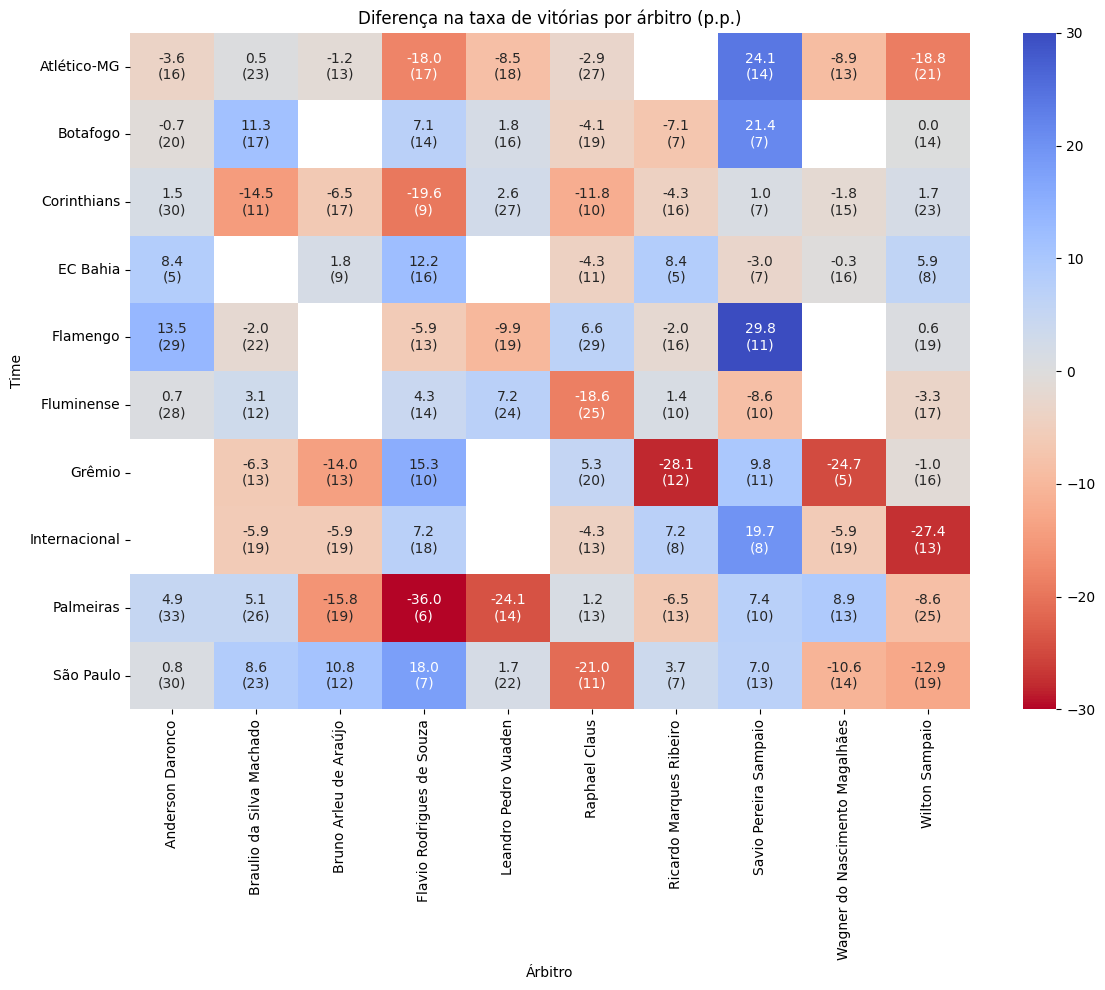

In [15]:
# Seleciona apenas os 10 times com mais partidas
top10_times = df_total.sort_values('partidas_total', ascending=False).head(10)['time'].tolist()

# Mescla dados de árbitros/times e números totais de cada time
# Adiciona cálculo da diferença percentual entre a taxa de vitória do time e a taxa de vitória por árbitro
df_comparacao = pd.merge(df_arbitro, df_total, on='time', how='left')
df_comparacao['diferenca_pp'] = (df_comparacao['taxa_arbitro'] - df_comparacao['taxa_total']) * 100

# Prepara anotações para o heatmap: diferencial por árbitro e número de partidas
diferencas = df_comparacao.query('time in @top10_times & partidas_arbitro >= 5').pivot(index='time', columns='arbitro', values='diferenca_pp')
partidas = df_comparacao.query('time in @top10_times & partidas_arbitro >= 5').pivot(index='time', columns='arbitro', values='partidas_arbitro')

annot = diferencas.copy()

for i in range(diferencas.shape[0]):
    for j in range(diferencas.shape[1]):
        val = diferencas.iloc[i, j]
        n_partidas = partidas.iloc[i, j]
        if pd.notnull(val) and pd.notnull(n_partidas):
            annot.iloc[i, j] = f'{val:.1f}\n({int(n_partidas)})'
        else:
            annot.iloc[i, j] = ''

# Cria o heatmap das diferenças: árbitros beneficiam times?
plt.figure(figsize=(12, 10))

sns.heatmap(
    df_comparacao.query('time in @top10_times & partidas_arbitro >= 5').pivot(index='time', columns='arbitro', values='diferenca_pp'),
    annot=annot,
    cmap='coolwarm_r',
    center=0,
    vmin=-30,
    vmax=30,
    fmt=''
)

plt.title('Diferença na taxa de vitórias por árbitro (p.p.)')
plt.ylabel('Time')
plt.xlabel('Árbitro')
plt.tight_layout()
plt.show()